## Overview

Online retail is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## 1. Read and visualise the data

In [116]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from sklearn.preprocessing import StandardScaler

In [117]:
# Read the dataset
retail_df=pd.read_csv(r"C:\Users\HPPC\Desktop\Projects MY\Online+Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [118]:
retail_df.shape

(541909, 8)

In [119]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 2. Clean the data

In [120]:
# Missing Values
(retail_df.isnull().sum()/len(retail_df))*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [121]:
# drop all rows having missing values
retail_df=retail_df.dropna()

In [122]:
retail_df.shape

(406829, 8)

In [123]:
# Creating new column- Amount
retail_df["amount"]=retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


## 3. Prepare the data for modelling

##### -R (Recency): Number of days since last purchase
##### -F (Frequency): Number of transactions
##### -M (Monetary): Total amount of transactions (revenue contributed)

In [124]:
# Monetary
grouped_df=retail_df.groupby("CustomerID")['amount'].sum()

In [125]:
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [126]:
# Frequency
frequency_df=retail_df.groupby("CustomerID")["InvoiceNo"].count()
frequency_df=frequency_df.reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [127]:
# Changing the name InvoiceNo to frequency
frequency_df.columns=["CustomerID","frequency"]
frequency_df.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [128]:
# Merge the two dataframes- grouped_df and frequency_df
grouped_df=pd.merge(grouped_df,frequency_df,on='CustomerID',how="inner")
grouped_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [129]:
# Converting the InvoiceDate to datetime format
retail_df["InvoiceDate"]=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [130]:
# Compute the max date
max_date=max(retail_df.InvoiceDate)
max_date

Timestamp('2011-12-09 12:50:00')

In [131]:
# Compute the difference between max date & InvoiceDate
retail_df["diff"]=max_date-retail_df.InvoiceDate
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [132]:
# Calculating recency
last_purchase_df=retail_df.groupby("CustomerID")['diff'].min()
last_purchase_df=last_purchase_df.reset_index()
last_purchase_df.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [133]:
# merging the two dataframes grouped_df & last_purchase_df
grouped_df=pd.merge(grouped_df,last_purchase_df,on="CustomerID",how="inner")
grouped_df.head()

,CustomerID,amount,frequency,diff
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [134]:
# Rename the diff column to recency
grouped_df.columns=["CustomerID","amount","frequency","recency"]
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [135]:
# Extracting the number of days only in the recency column
grouped_df["recency"]=grouped_df["recency"].dt.days
grouped_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [136]:
# removing (statistical) outliers

# Outlier treatment for amount
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

#Outlier treatment for frequency
Q1=grouped_df.frequency.quantile(0.05)
Q3=grouped_df.frequency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.frequency >=Q1-1.5*IQR)&(grouped_df.frequency<=Q3+1.5*IQR)]

# Outlier treatment for recency
Q1=grouped_df.recency.quantile(0.05)
Q3=grouped_df.recency.quantile(0.95)
IQR=Q3-Q1
grouped_df=grouped_df[(grouped_df.recency >=Q1-1.5*IQR)&(grouped_df.recency<=Q3+1.5*IQR)]



In [137]:
grouped_df.describe()

,CustomerID,amount,frequency,recency
count,4293.000000,4293.000000,4293.000000,4293.000000
mean,15299.900769,1270.411464,77.483578,92.548567
std,1722.942628,1755.551155,100.270448,101.006845
min,12346.000000,-4287.630000,1.000000,0.000000
25%,13811.000000,289.360000,17.000000,17.000000
50%,15304.000000,632.970000,40.000000,50.000000
75%,16779.000000,1518.430000,97.000000,145.000000
max,18287.000000,13677.590000,718.000000,373.000000


In [138]:
## rescaling
rfm_df = grouped_df[['amount', 'frequency', 'recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [139]:
# Converting to dataframe
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=["amount","frequency","recency"]
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


# 4. Modelling

## K-Means Clustering

In [140]:
# importing the libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [141]:
# k-means with some arbitrary k
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [142]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

## Finding the Optimal Number of Clusters

#### Elbow-curve/Sum of squared distance(SSDs)

In [143]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    

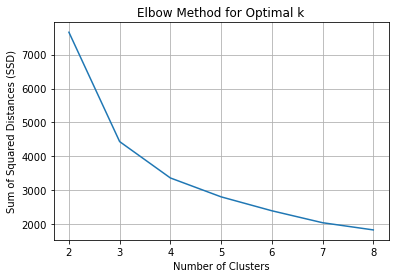

In [144]:
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.xticks(range(len(range_n_clusters)), range_n_clusters)
plt.show()

In [145]:
# silhouette analysis
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels=kmeans.labels_
    
# silhouette score
    silhouette_avg=silhouette_score(rfm_df_scaled,cluster_labels)
    print("for n_clusters={0} the silhouette score is{1}".format(num_clusters,silhouette_avg))

for n_clusters=2 the silhouette score is0.5415858652525395
for n_clusters=3 the silhouette score is0.5084896296141937
for n_clusters=4 the silhouette score is0.4777820100216849
for n_clusters=5 the silhouette score is0.46627005641897035
for n_clusters=6 the silhouette score is0.4170295629765814
for n_clusters=7 the silhouette score is0.4148000729503976
for n_clusters=8 the silhouette score is0.40192885592712724


In [146]:
# Final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [147]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2])

In [148]:
grouped_df["cluster_id"]=kmeans.labels_

In [150]:
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


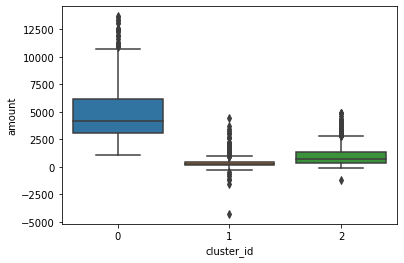

In [152]:
# plot
sns.boxplot(x='cluster_id', y='amount', data=grouped_df)
plt.show()

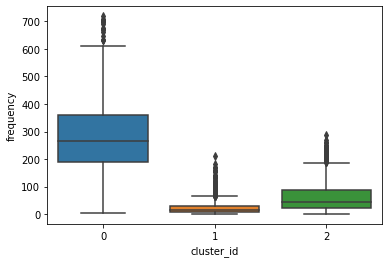

In [153]:
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)
plt.show()

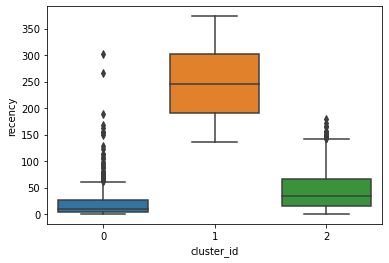

In [154]:
sns.boxplot(x='cluster_id', y='recency', data=grouped_df)
plt.show()

# Hierarchical Clustering

In [155]:
# Importing the required libraries
from scipy.cluster.hierarchy import cut_tree,dendrogram,linkage

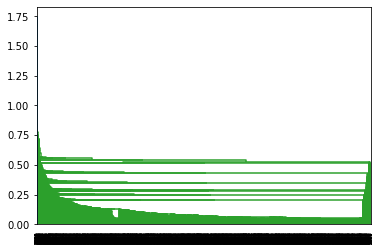

In [156]:
# Single linkage
mergings=linkage(rfm_df_scaled)
dendrogram(mergings)
plt.show()

In [158]:
# As it is clear above, single linkage doesn't produce a good enough result for us to analyse the clusters. 
#Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

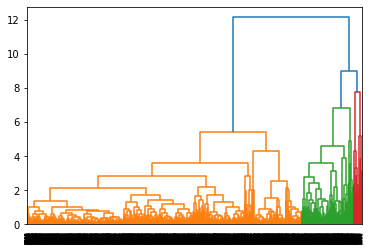

In [157]:
# Complete linkage
mergings=linkage(rfm_df_scaled,method="complete")
dendrogram(mergings)
plt.show()

In [159]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [160]:
# assign cluster labels
grouped_df['cluster_labels'] = cluster_labels
grouped_df.head()

,CustomerID,amount,frequency,recency,cluster_id,cluster_labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,0,1
2,12348.0,1797.24,31,74,2,0
3,12349.0,1757.55,73,18,2,0
4,12350.0,334.40,17,309,1,0


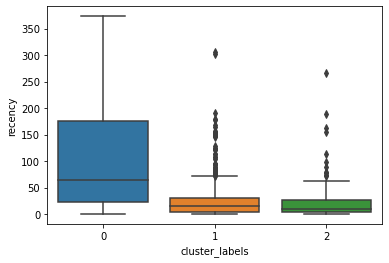

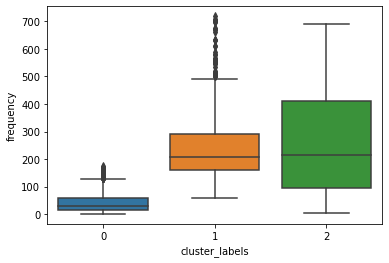

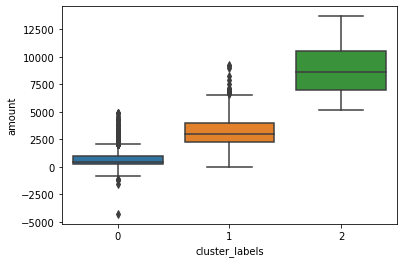

In [174]:
# plots
rfm=["recency","frequency","amount"]
for item in rfm:
    sns.boxplot(x='cluster_labels', y=item, data=grouped_df)
    plt.show()

#### Using both the clustering methods we found out that 3 clusters would be an optimal solution.

In [ ]:
----------------------------------------------------END-------------------------------------------------------------------------